<a href="https://colab.research.google.com/github/Bhuvana908/ML-Projects/blob/main/Dimensionality%20reductions/Dimensionality_Reductions_in_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ISOMAP for Face Data Visualization 🖼️🔍

This notebook demonstrates **nonlinear dimensionality reduction** on the **Labeled Faces in the Wild (LFW) dataset** using **ISOMAP**.

Users can:

- **Load the Dataset** → Fetch faces with at least 200 images per person:
  - Flatten images into vectors (`X = faces.data`)
  - Keep original images for visualization (`images = faces.images`)

- **Visualize Sample Faces** → Display a few faces using Matplotlib to understand the dataset.

- **Run ISOMAP** → Reduce the high-dimensional face vectors (64×64 = 4096 dimensions) into 2D while preserving neighborhood structure:
  - `n_neighbors=5`
  - `n_components=2`

- **Scatter Plot Visualization** → Plot 2D projections as dots to inspect overall structure.

- **Scatter + Thumbnails** → Overlay face thumbnails on the scatter plot for easier interpretation of clusters:
  - Uses `OffsetImage` and `AnnotationBbox` from Matplotlib
  - Avoids overlapping thumbnails using a minimum distance threshold

- **Observe Clusters** → Faces with similar orientation, lighting, or expression appear close together in the 2D space, revealing underlying patterns.

This project demonstrates the use of **ISOMAP for dimensionality reduction and data visualization**, making high-dimensional image datasets interpretable and ready for further analysis or machine learning tasks.


In [ ]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=200)
faces.data.shape

(766, 2914)

Let us visualize our original dataset before dimensionality reduction

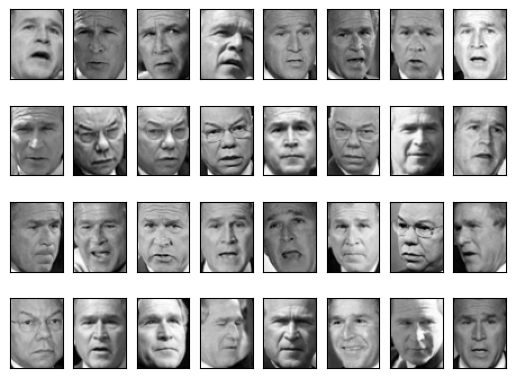

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(4, 8, subplot_kw=dict(xticks=[], yticks=[]))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='gray')

📌 What the above code does overall:

*   Creates a 4 × 8 grid of subplots (32 total).
*   Loops through the first 32 images from the faces dataset.
*   Displays each face in a subplot, without axis ticks, in grayscale.


Result: You get a nice tiled grid of face images in one figure.





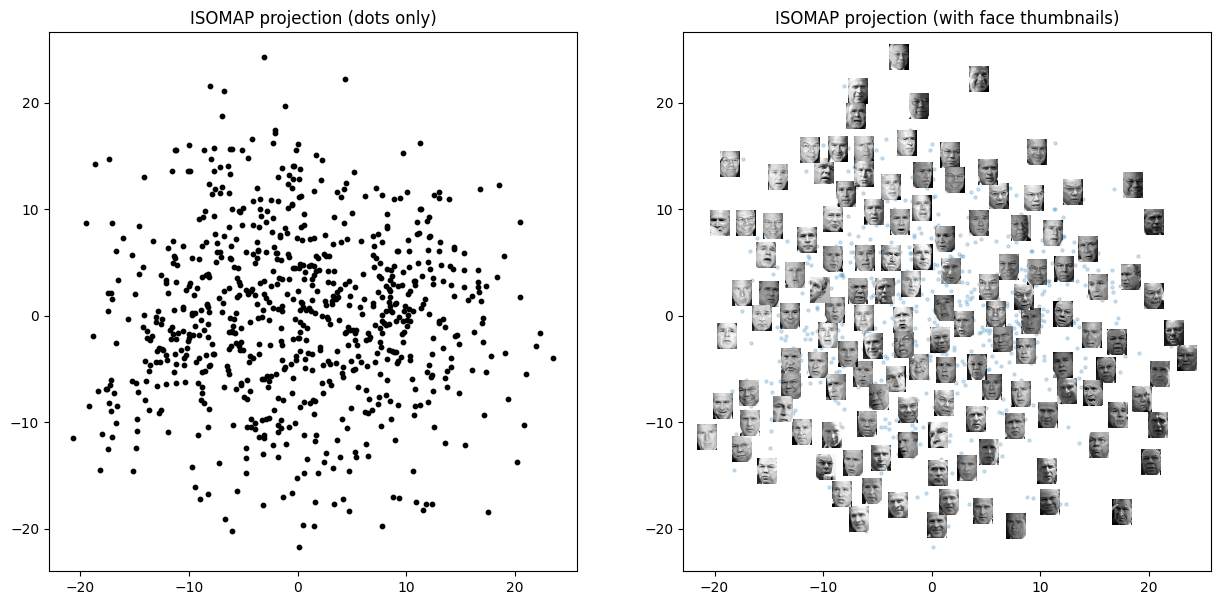

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn.manifold import Isomap
import numpy as np
X = faces.data       # flattened face vectors
images = faces.images  # original images

# Run ISOMAP to 2D
isomap = Isomap(n_neighbors=5, n_components=2)
proj = isomap.fit_transform(X)

# --- Plot ---
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

# 1) Just scatter plot
axes[0].scatter(proj[:, 0], proj[:, 1], s=10, c="k")
axes[0].set_title("ISOMAP projection (dots only)")

# 2) Scatter + thumbnails
axes[1].scatter(proj[:, 0], proj[:, 1], s=5, alpha=0.2)  # faint dots

# Function to overlay thumbnails
def plot_thumbnails(ax, proj, images, thumb_frac=0.05):
    min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 2
    shown_images = np.array([2 * proj.max(0)])  # start with one point far away
    for i in range(proj.shape[0]):
        dist = np.sum((proj[i] - shown_images) ** 2, 1)
        if np.min(dist) < min_dist_2:
            continue  # skip if too close to another thumbnail
        shown_images = np.vstack([shown_images, proj[i]])
        imagebox = offsetbox.AnnotationBbox(
            offsetbox.OffsetImage(images[i], cmap='gray', zoom=0.6),
            proj[i],
            frameon=False
        )
        ax.add_artist(imagebox)

plot_thumbnails(axes[1], proj, images[:, ::2, ::2])  # downsample images
axes[1].set_title("ISOMAP projection (with face thumbnails)")

plt.show()

Conclusions

1. ISOMAP preserves similarity:

    Faces that look alike in terms of orientation, lighting, or expression are mapped close together in 2D space.

2. Axes reflect major variations:

    One axis seems to roughly correspond to face orientation (left ↔ right turn).

    Another axis seems to correspond to lighting/darkness (bright ↔ dark faces).

    These are interpreted visually, not explicitly labeled by the algorithm.

3. Thumbnails help interpret the manifold:

    Without thumbnails, the dots alone don’t reveal which faces are close.

    With thumbnails, you can see the actual facial patterns captured by ISOMAP.

4. Clusters may overlap:

    Even though ISOMAP separates similar faces, there’s some overlap because the dataset contains multiple people, poses, and lighting conditions.

# PCA on Iris Dataset 🌸📊

This notebook demonstrates **Principal Component Analysis (PCA)** on the **Iris dataset** to reduce dimensionality and visualize data in 2D.

Users can:

- **Load the Dataset** → Use the Iris dataset from `sklearn.datasets`:
  - `X` contains feature columns (`sepal length`, `sepal width`, `petal length`, `petal width`)
  - `y` contains target labels (species of iris)

- **View Original Data** → Display the first 10 rows and check dataset shape.

- **Standardize Features** → Scale features using `StandardScaler` to have zero mean and unit variance.

- **Perform PCA** → Apply PCA to reduce dimensionality:
  - Plot **cumulative explained variance** to see how many components capture most of the variance.
  - Reduce to **2 principal components** (`PC1` and `PC2`) for visualization.

- **Visualize PCA Results** → Scatter plot of the first two principal components:
  - Points colored by iris species
  - Helps observe **separability and clustering** in reduced 2D space

- **Inspect Variance Explained** → Print explained variance ratio and total variance explained by the selected components.

This project demonstrates the use of **PCA for dimensionality reduction, feature extraction, and data visualization**, making high-dimensional datasets interpretable and ready for downstream analysis or machine learning tasks.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

print("===== ORIGINAL DATASET (First 10 Rows) =====")
print(X.head(10))
print("\nShape of dataset:", X.shape)

===== ORIGINAL DATASET (First 10 Rows) =====
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
5                5.4               3.9                1.7               0.4
6                4.6               3.4                1.4               0.3
7                5.0               3.4                1.5               0.2
8                4.4               2.9                1.4               0.2
9                4.9               3.1                1.5               0.1

Shape of dataset: (150, 4)


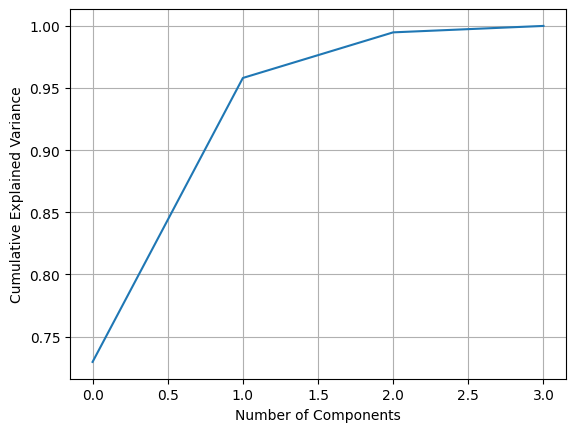

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA().fit(X_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

The first 2–3 principal components capture almost all the dataset’s variance (around 95–99%), meaning most information is preserved with just these components.
Beyond that, additional components add very little new information, so dimensionality can be safely reduced to 2 or 3.

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['target'] = y

print("\n===== PCA TRANSFORMED DATA (First 10 Rows) =====")
print(pca_df.head(10))




===== PCA TRANSFORMED DATA (First 10 Rows) =====
        PC1       PC2  target
0 -2.264703  0.480027       0
1 -2.080961 -0.674134       0
2 -2.364229 -0.341908       0
3 -2.299384 -0.597395       0
4 -2.389842  0.646835       0
5 -2.075631  1.489178       0
6 -2.444029  0.047644       0
7 -2.232847  0.223148       0
8 -2.334640 -1.115328       0
9 -2.184328 -0.469014       0


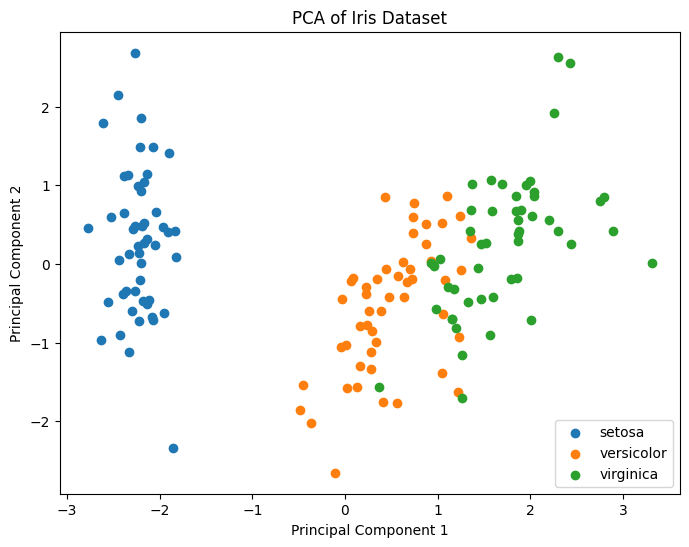

In [ ]:
plt.figure(figsize=(8,6))
for label in np.unique(y):
    plt.scatter(
        pca_df[pca_df['target']==label]['PC1'],
        pca_df[pca_df['target']==label]['PC2'],
        label=data.target_names[label]
    )
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.legend()
plt.show()


Setosa (class 0) forms a well-separated cluster, clearly distinct from the other two classes.

Versicolor (class 1) and Virginica (class 2) show partial overlap, indicating these classes are more similar in feature space.

PCA successfully reduces dimensionality while preserving the main variance and class separability, making patterns visually clear in 2D.

In [ ]:
print("\nExplained variance ratio:", pca.explained_variance_ratio_)
print("Total variance explained:", sum(pca.explained_variance_ratio_))


Explained variance ratio: [0.72962445 0.22850762]
Total variance explained: 0.9581320720000166


# t-SNE on Digits Dataset 🔢📊

This notebook demonstrates **t-distributed Stochastic Neighbor Embedding (t-SNE)** on the **Digits dataset** to visualize high-dimensional image data in 2D.

Users can:

- **Load the Dataset** → Use the Digits dataset from `sklearn.datasets`:
  - `X` contains 64 features (8x8 images flattened)
  - `y` contains digit labels (0-9)

- **View Original Data** → Display the first 10 rows and check dataset shape and labels.

- **Standardize Features** → Scale features using `StandardScaler` to have zero mean and unit variance.

- **Apply t-SNE** → Reduce dimensionality to **2 components** for visualization:
  - `n_components=2`
  - `perplexity=30`
  - `learning_rate=200`
  - `random_state=42`

- **Visualize t-SNE Results** → Scatter plot of the 2D embedding:
  - Points colored by digit labels
  - Helps observe **clusters and separability** in high-dimensional data

- **Inspect Transformed Data** → Display the first 10 rows of the t-SNE transformed dataset.

This project demonstrates the use of **t-SNE for nonlinear dimensionality reduction and data visualization**, making **high-dimensional image datasets interpretable and ready** for exploration or further machine learning tasks.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits

# Load Digits dataset
digits = load_digits()
X = X = pd.DataFrame(digits.data)        # 64 features (8x8 images flattened)
y = digits.target         # digit labels (0-9)

print("===== ORIGINAL DATASET (First 10 Rows) =====")
print(X.head(10))
print("\nShape of dataset:", X.shape)
print("First 10 labels:", y[:10])


===== ORIGINAL DATASET (First 10 Rows) =====
    0    1     2     3     4     5     6    7    8    9   ...   54   55   56  \
0  0.0  0.0   5.0  13.0   9.0   1.0   0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1  0.0  0.0   0.0  12.0  13.0   5.0   0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2  0.0  0.0   0.0   4.0  15.0  12.0   0.0  0.0  0.0  0.0  ...  5.0  0.0  0.0   
3  0.0  0.0   7.0  15.0  13.0   1.0   0.0  0.0  0.0  8.0  ...  9.0  0.0  0.0   
4  0.0  0.0   0.0   1.0  11.0   0.0   0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
5  0.0  0.0  12.0  10.0   0.0   0.0   0.0  0.0  0.0  0.0  ...  4.0  0.0  0.0   
6  0.0  0.0   0.0  12.0  13.0   0.0   0.0  0.0  0.0  0.0  ...  8.0  0.0  0.0   
7  0.0  0.0   7.0   8.0  13.0  16.0  15.0  1.0  0.0  0.0  ...  0.0  0.0  0.0   
8  0.0  0.0   9.0  14.0   8.0   1.0   0.0  0.0  0.0  0.0  ...  8.0  0.0  0.0   
9  0.0  0.0  11.0  12.0   0.0   0.0   0.0  0.0  0.0  2.0  ...  4.0  0.0  0.0   

    57    58    59    60    61   62   63  
0  0.0   6.0  13.0  10.0   0.0 

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

tsne_df = pd.DataFrame(data=X_tsne, columns=['Dim1', 'Dim2'])
tsne_df['target'] = y

print("\n===== t-SNE TRANSFORMED DATA (First 10 Rows) =====")
print(tsne_df.head(10))


===== t-SNE TRANSFORMED DATA (First 10 Rows) =====
        Dim1       Dim2  target
0 -43.933941 -36.381721       0
1 -18.166180  -2.729244       1
2   5.112404 -17.671968       2
3  28.663795   5.110395       3
4 -41.376953   4.408359       4
5  42.405552  13.540843       5
6   0.022568 -40.242878       6
7 -12.746357  37.169079       7
8   7.643678  -4.850455       8
9  42.501328  15.511162       9


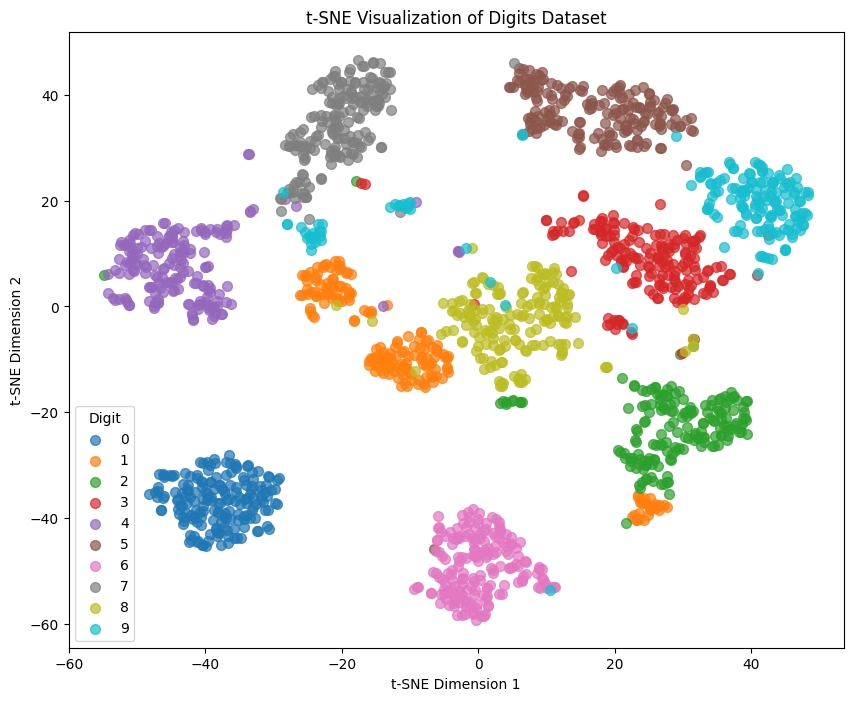

In [ ]:
plt.figure(figsize=(10,8))
for label in np.unique(y):
    plt.scatter(
        tsne_df[tsne_df['target']==label]['Dim1'],
        tsne_df[tsne_df['target']==label]['Dim2'],
        label=str(label),
        alpha=0.7,
        s=50
    )
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE Visualization of Digits Dataset')
plt.legend(title='Digit')
plt.show()

t-SNE clearly separates most digits into distinct clusters, showing strong class separability in high-dimensional space. Some overlap exists between similar digits, reflecting inherent similarity in their pixel patterns. Overall, t-SNE provides an intuitive 2D visualization of the 64-dimensional Digits dataset.

# Comparison between ISOMAP, PCA and t-SNE

PCA is used when you want to reduce dimensionality linearly while preserving as much variance as possible; good for high-dimensional, linearly correlated data.

ISOMAP is useful when data lies on a nonlinear manifold and you want to preserve global geometric structure in lower dimensions.

t-SNE is ideal for visualizing high-dimensional data in 2D or 3D by preserving local similarities; great for clusters but not for global distances.